In [2]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             


#import seaborn as sns

chan=0



/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
aftp_Q_data  = []
aftp_Q_MC    = []
aftp_Q_newMC = []


aftp_max_data  = []
aftp_max_MC    = []
aftp_max_newMC = []

In [4]:
        #MC_file_path ='/media/ttaverni/Transcend/MC_s/Heide/nsb0_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb125_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb250_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes.simtel.gz'
        MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes_large-stat.simtel.gz'
        
        inputfile_reader = event_source(
            input_url = MC_file_path,
            max_events=10000)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            for wf in event.r0.tel[1].waveform[chan]:
                rn_wf = wf -250.
                #if (wf[:60]-250.).max()> 14*5.:
                aftp_Q_MC.append( np.max( [rn_wf[ii:ii+12].sum()/58. for ii in range(50) ] ) )
                aftp_max_MC.append(rn_wf.max())
        wfs_MC = np.array(all_wfs)

In [5]:
        #newMC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_newWF.simtel.gz'
        newMC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_WF1010_noise36_TTled.simtel.gz'
        
        inputfile_reader = event_source(
            input_url = newMC_file_path,
            max_events=10000)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            for wf in event.r0.tel[1].waveform[chan]:
                rn_wf = wf -250.
                #if (wf[:60]-250.).max()> 14*5.:
                aftp_Q_newMC.append( np.max( [rn_wf[ii:ii+12].sum()/58. for ii in range(50) ] ) )
                aftp_max_newMC.append(rn_wf.max())
        wfs_newMC = np.array(all_wfs)

In [6]:
        ## NSB = 0 : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1533.000[0-9].fits.fz'
        ## NSB ~= 125 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1538.000[0-9].fits.fz'
        ## NSB <~= 250 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1539.000[0-9].fits.fz'
        ## NSB <= 500 MHz (?) : 
        data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1542.000[0-9].fits.fz'
        
        
        inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=10000)

        cfg = inputfile_reader.camera_config
        pix_ids = cfg.expected_pixels_id
        
        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            for wf in event.r0.tel[event.r0.tels_with_data[0]].waveform[chan,pix_ids]:
                rn_wf = wf -250.
                #if (wf-250.).max()> 14*5.:
                aftp_Q_data.append( np.max( [rn_wf[ii:ii+12].sum()/58. for ii in range(50) ] ) )
                aftp_max_data.append(rn_wf.max())
        wfs_data = np.array(all_wfs)

In [7]:
all_wfs = []

In [8]:
aftp_Q_data  = np.array(aftp_Q_data)
aftp_Q_MC    = np.array(aftp_Q_MC)
aftp_Q_newMC = np.array(aftp_Q_newMC)

aftp_max_data  = np.array(aftp_max_data)
aftp_max_MC    = np.array(aftp_max_MC)
aftp_max_newMC = np.array(aftp_max_newMC)

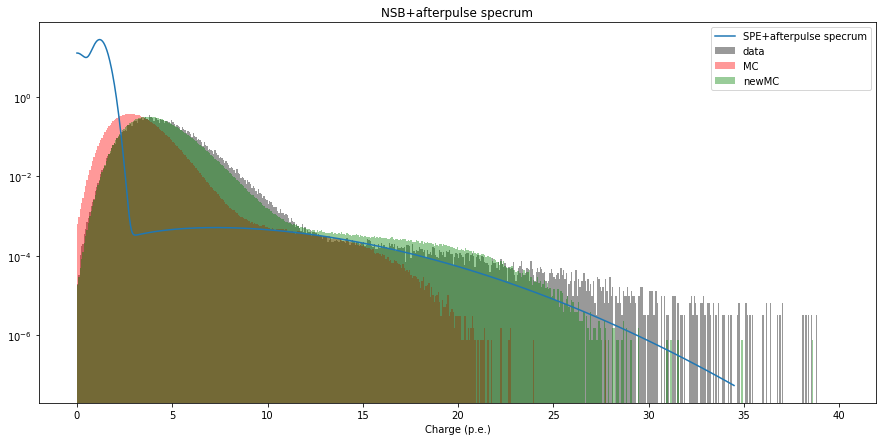

In [9]:
        n,b,p = plt.hist((aftp_max_data/14.),bins=np.arange(0,40,1/14.), \
                 color='black', alpha=.4,density=1, label = 'data') 
    
        n,b,p = plt.hist((aftp_max_MC/14.),bins=np.arange(0,40,1/14.), \
                 color='red'  , alpha=.4,density=1, label = 'MC')
        
        n,b,p = plt.hist((aftp_max_newMC/14.),bins=np.arange(0,40,1/14.), \
                 color='green'  , alpha=.4,density=1, label = 'newMC')
        #n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
        #         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
        plt.gca().set_yscale('log')
        plt.gca().set_xlabel('Charge (p.e.)')
        plt.gca().set_title('NSB+afterpulse specrum')
        from astropy.io import ascii
        fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
        aaa = ascii.read(fff)
        plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
        l=plt.gca().legend()

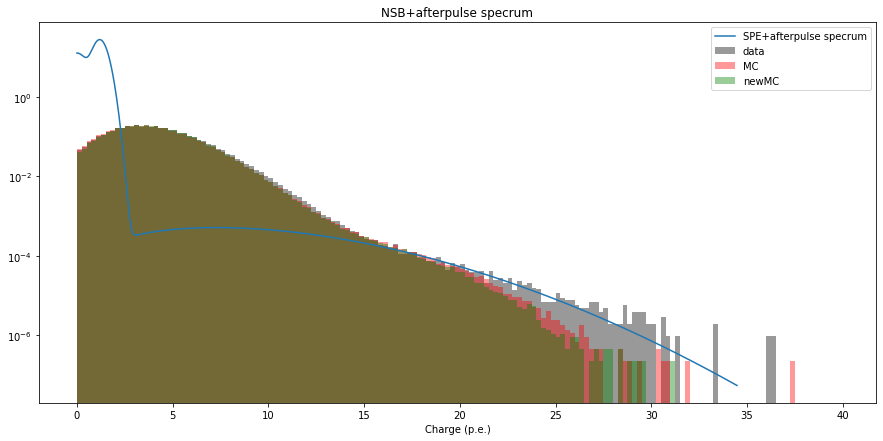

In [10]:

n,b,p = plt.hist(aftp_Q_data, bins=np.arange(0,40,0.25), \
                 color='black', alpha=.4,density=1, label = 'data') 
n,b,p = plt.hist(aftp_Q_MC, bins=np.arange(0,40,0.25), \
                 color='red'  , alpha=.4,density=1, label = 'MC')

n,b,p = plt.hist(aftp_Q_newMC, bins=np.arange(0,40,0.25), \
                 color='green'  , alpha=.4,density=1, label = 'newMC')

#n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
#         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Charge (p.e.)')
plt.gca().set_title('NSB+afterpulse specrum')
from astropy.io import ascii
fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
aaa = ascii.read(fff)
plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
l=plt.gca().legend()

In [11]:
mm1 = (aftp_max_data  > 17*12.) & (aftp_Q_data   > 12.)
mm2 = (aftp_max_MC    > 17*12.) & (aftp_Q_MC     > 12.)
mm3 = (aftp_max_newMC > 17*12.) & (aftp_Q_newMC > 12.)

Text(0.5, 1.0, 'Afterpulse amplitude')

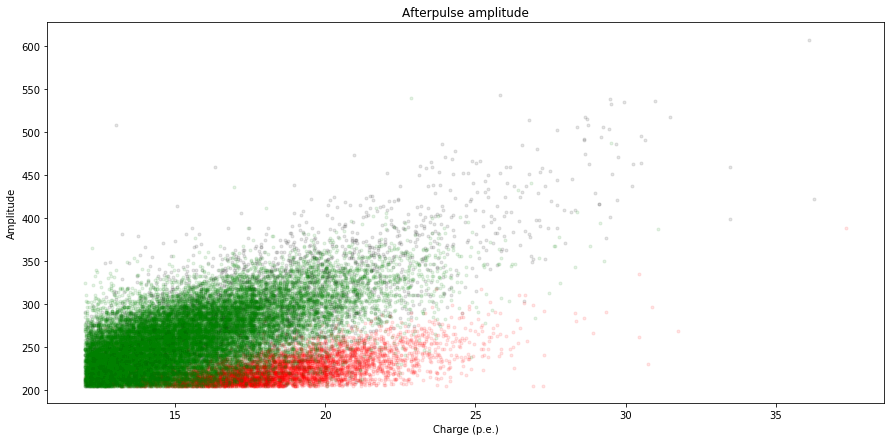

In [12]:
plt.plot(aftp_Q_data[mm1],aftp_max_data[mm1],   '.',color='black', alpha=.1)
plt.plot(aftp_Q_MC[mm2],aftp_max_MC[mm2],       '.',color='red',   alpha=.1)
plt.plot(aftp_Q_newMC[mm3],aftp_max_newMC[mm3], '.',color='green', alpha=.1)
plt.gca().set_ylabel('Amplitude')
plt.gca().set_xlabel('Charge (p.e.)')
plt.gca().set_title('Afterpulse amplitude')


In [13]:
print((aftp_max_data[mm1]/aftp_Q_data[mm1]).mean())
print((aftp_max_MC[mm2]/aftp_Q_MC[mm2]).mean())
print((aftp_max_newMC[mm3]/aftp_Q_newMC[mm3]).mean())

16.871227126596388
12.376978445750016
17.014608829911396


NameError: name 'apt' is not defined